In [1]:
# https://deepnote.com/@code-along-tutorials/Natural-Language-Processing-in-Python-Exploring-Word-Frequencies-with-NLTK-47ec085a-7a46-4f5d-89a1-e08be7d164c5

In [2]:
#!pip install WordCloud
#!pip install nltk

In [3]:
import nltk, string
nltk.download("stopwords")   # Download and import list of stopwords
#nltk.download('punkt_tab')
nltk.download('punkt')       # Download punkt tokenizer models
from nltk import word_tokenize
from nltk.probability import FreqDist

import urllib.request
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
#Retrieve a copy of the text from the url
#link = "https://www.gutenberg.org/cache/epub/64317/pg64317.txt"
#link = "https://www.gutenberg.org/files/1661/1661-0.txt"
link = "https://www.gutenberg.org/files/11/11-0.txt"
link = "https://www.gutenberg.org/cache/epub/1513/pg1513.txt"
link = "https://www.gutenberg.org/cache/epub/84/pg84.txt"

In [5]:
text_file = urllib.request.urlopen(link)
text      = text_file.read().decode('utf-8')   #Read and decode the text

In [6]:
print(text[1400:1800])  #Preview a section of the text

pter 22
 Chapter 23
 Chapter 24




Letter 1

_To Mrs. Saville, England._


St. Petersburgh, Dec. 11th, 17—.


You will rejoice to hear that no disaster has accompanied the
commencement of an enterprise which you have regarded with such evil
forebodings. I arrived here yesterday, and my first task is to assure
my dear sister of my welfare and increasing confidence in the success


In [7]:
words = word_tokenize(text)   #tokenize text by words

In [8]:
print(f"The total number of words in the text is {len(words)}")

The total number of words in the text is 88761


In [9]:
fdist = FreqDist(words)   #find the frequency of words

In [10]:
print(fdist.most_common(20))  #print the 10 most common words

[(',', 5106), ('the', 4072), ('and', 2997), ('I', 2839), ('.', 2811), ('of', 2747), ('to', 2154), ('my', 1632), ('a', 1395), ('in', 1135), ('was', 1020), ('that', 1016), (';', 976), ('me', 857), ('with', 704), ('had', 684), ('not', 581), ('which', 565), ('but', 551), ('you', 549)]


In [11]:
#words_no_punc = []      # create an empty list to store words
#for word in words:      # iterate through the words list to remove punctuations
#    if word.isalpha():
#        words_no_punc.append(word.lower())

In [12]:
words_no_punc = []         # store clean words
removed_punct = []         # store removed words (with punctuation)
#         .         .         .         .         .         .         .         .         .         .         .         .
for word in words:
    if word.isalpha():
        words_no_punc.append(word.lower())
    else:
        # Extract individual punctuation characters from the word
        for char in word:
            if char in string.punctuation:
                removed_punct.append(char)
#         .         .         .         .         .         .         .         .         .         .         .         .
removed_punct = list(dict.fromkeys(removed_punct))
print("Removed punctuation or non-alphabetic entries:")
print(removed_punct)

Removed punctuation or non-alphabetic entries:
[';', ',', '.', '-', ':', '[', '#', ']', '*', '(', ')', '_', '?', '!', '/', '%', '$']


In [13]:
#print number of words without punctuation
print(f"The total number of words without punctuation is {len(words_no_punc)}")

The total number of words without punctuation is 77506


In [14]:
fdist = FreqDist(words_no_punc)   #find the frequency of words

In [15]:
stopwords_list = stopwords.words("english")

In [16]:
custom_stopwords = ["would", "could", "also", "one", "like", 'may']  # <-- Add your own

In [17]:
stopwords_list = list(set(stopwords_list + custom_stopwords))

In [18]:
builtin_set = set(stopwords_list);    RED = '\033[91m'
custom_set = set(custom_stopwords);   RESET = '\033[0m'

for word in sorted(stopwords_list):
    if word in custom_set:
        print(f"{RED}{word}{RESET}", end=" ")
    else:
        print(word, end=" ")

a about above after again against ain all also am an and any are aren aren't as at be because been before being below between both but by can could couldn couldn't d did didn didn't do does doesn doesn't doing don don't down during each few for from further had hadn hadn't has hasn hasn't have haven haven't having he he'd he'll he's her here hers herself him himself his how i i'd i'll i'm i've if in into is isn isn't it it'd it'll it's its itself just like ll m ma may me mightn mightn't more most mustn mustn't my myself needn needn't no nor not now o of off on once one only or other our ours ourselves out over own re s same shan shan't she she'd she'll she's should should've shouldn shouldn't so some such t than that that'll the their theirs them themselves then there these they they'd they'll they're they've this those through to too under until up ve very was wasn wasn't we we'd we'll we're we've were weren weren't what when where which while who whom why will with won won't would wo

In [19]:
clean_words = []   # create an empty list to store clean words
# Iterate through the words_no_punc list and add non stopwords to the new clean_words list
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

In [20]:
plt.show(); print(f"The total number of words without punctuation and stopwords is {len(clean_words)}")

The total number of words without punctuation and stopwords is 34793


In [21]:
fdist = FreqDist(clean_words)        #find the frequency of words
print(fdist.most_common(20))  #print the 10 most common words

[('yet', 152), ('man', 136), ('father', 133), ('upon', 128), ('life', 113), ('every', 109), ('first', 108), ('might', 108), ('shall', 106), ('eyes', 104), ('said', 102), ('time', 97), ('even', 96), ('towards', 94), ('saw', 94), ('found', 89), ('elizabeth', 89), ('project', 88), ('night', 87), ('mind', 85)]


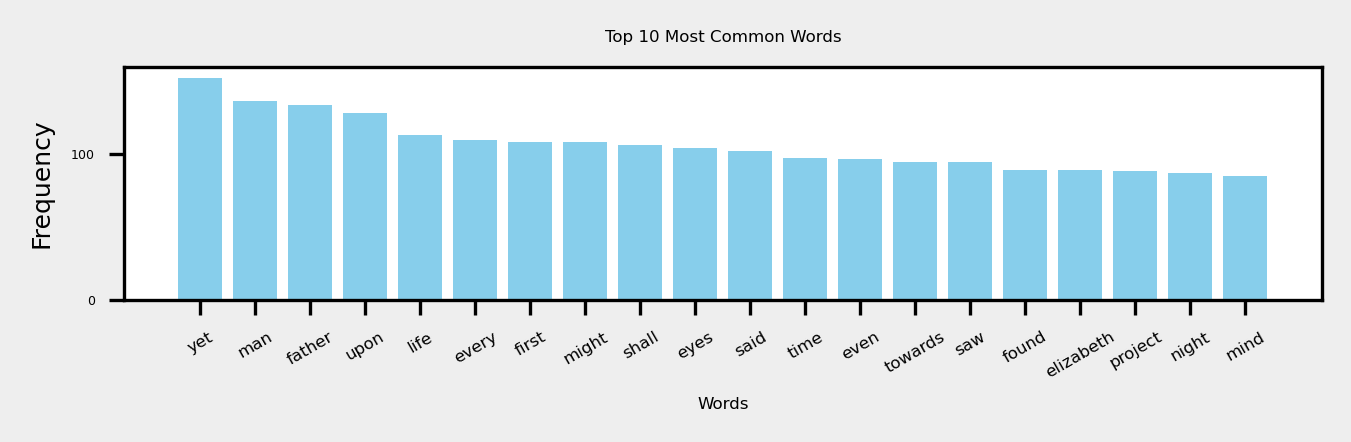

In [22]:

most_common = fdist.most_common(20)  # Get 20 most common words
words, counts = zip(*most_common)    # Separate words and counts

# Create the plot with explicit font size control
plt.figure(figsize=(11.7 / 2.54, 4 / 2.54), dpi=300, facecolor='#EEEEEE')
plt.bar(words, counts, color='skyblue')
plt.xticks(fontsize=4, rotation=30)  # Smaller font for x-axis labels
plt.yticks(fontsize=3)               # Smaller font for y-axis labels
plt.title("Top 10 Most Common Words", fontsize=4)
plt.xlabel("Words", fontsize=4)
plt.ylabel("Frequency", fontsize=6)

plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

In [23]:
clean_words_string = " ".join(clean_words) #Convert word list to a single string

In [24]:
color     = '#AAAAAA'
wordcloud = WordCloud(background_color=color, max_font_size=200, min_font_size=24, prefer_horizontal=1.0,
                      max_words=250, stopwords = stopwords_list, colormap="Reds",
                      width=1600, height=800).generate(clean_words_string) #generating the wordcloud

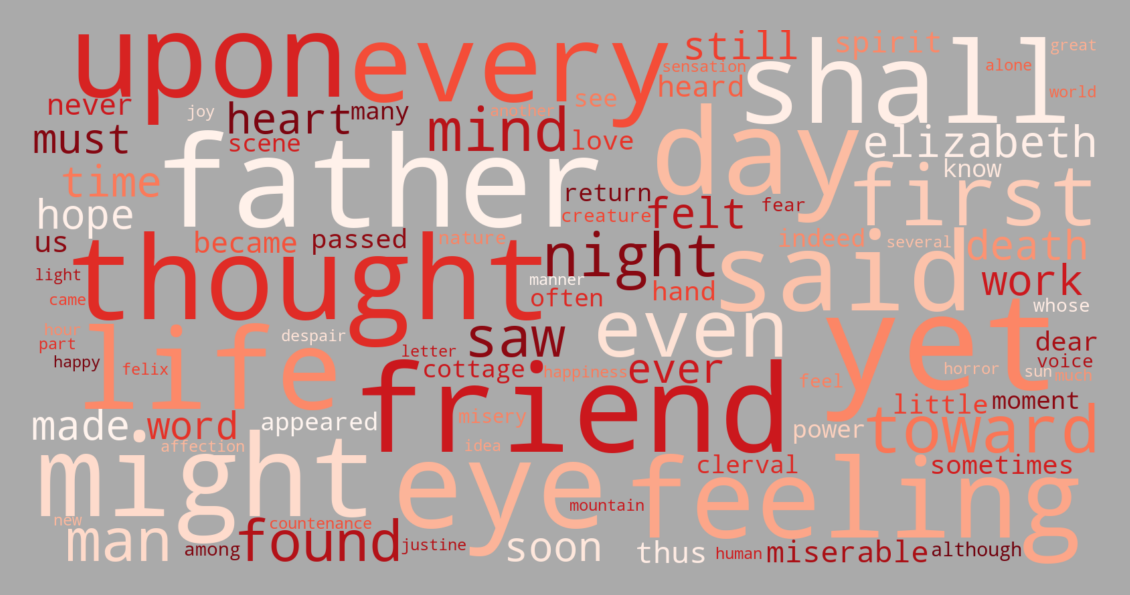

In [25]:
plt.figure(figsize = (11.7/2.54, 8.3/2.54), dpi=300, facecolor=color) #plot the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
STOP HERE!!!

SyntaxError: invalid syntax (2002750287.py, line 1)

In [ ]:
interpolation_methods = [
    'none', 'kaiser', 'spline36', 'sinc', 'blackman', 'bessel', 'hanning', 
    'gaussian', 'mitchell', 'auto', 'bilinear', 'nearest', 'catrom', 'spline16', 
    'antialiased', 'quadric', 'hermite', 'hamming', 'lanczos', 'bicubic'
]

# Plot the word cloud with different interpolation methods
for interpolation in interpolation_methods:
    plt.figure(figsize=(11.7/2.54, 8.3/2.54), dpi=300)  # Set figure size and DPI
    plt.imshow(wordcloud, interpolation=interpolation)  # Display word cloud with different interpolation
    plt.title(f"Interpolation: {interpolation}")  # Add title to each plot
    plt.axis("off")  # Hide axis
    plt.show()  # Show the plot